### Brief Intro of Strategy 
Market- NSE NIFTY 50;
Trend- Nify above the 200 SMA;
Entry- 10 period RSI below 30( Buy on the next day opening price);
Exit- 10 period RSI above 40 or after 10 trading days(Sell on next day opening price)
Source-https://www.youtube.com/watch?v=JvfK4VBX75I&t=0s

import yfinance as yf

In [18]:
import yfinance as yf  
import pandas as pd     

In [14]:
import pickle
import os
with open("nifty50tickers.pickle",'rb') as f:
    tickers = pickle.load(f)
tickers[:5]

['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK']

### Single Ticker Single Dataframe approach

In [30]:
for ticker in tickers:
    ticker_yahoo = ticker+'.NS'
    print(ticker_yahoo)
    if not os.path.exists('stock_dfs_updated/{}.csv'.format(ticker)):
      data = yf.download(ticker_yahoo,group_by="Ticker",start="2020-01-01", end=None)
      data = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)
      data.to_csv('stock_dfs_updated/{}.csv'.format(ticker))
    else:
      print('Already have'.format(ticker))

ADANIENT.NS


[*********************100%***********************]  1 of 1 completed


ADANIPORTS.NS


[*********************100%***********************]  1 of 1 completed


APOLLOHOSP.NS


[*********************100%***********************]  1 of 1 completed


ASIANPAINT.NS


[*********************100%***********************]  1 of 1 completed


AXISBANK.NS


[*********************100%***********************]  1 of 1 completed


BAJAJ-AUTO.NS


[*********************100%***********************]  1 of 1 completed


BAJFINANCE.NS


[*********************100%***********************]  1 of 1 completed


BAJAJFINSV.NS


[*********************100%***********************]  1 of 1 completed


BPCL.NS


[*********************100%***********************]  1 of 1 completed


BHARTIARTL.NS


[*********************100%***********************]  1 of 1 completed


BRITANNIA.NS


[*********************100%***********************]  1 of 1 completed


CIPLA.NS


[*********************100%***********************]  1 of 1 completed


COALINDIA.NS


[*********************100%***********************]  1 of 1 completed


DIVISLAB.NS


[*********************100%***********************]  1 of 1 completed


DRREDDY.NS


[*********************100%***********************]  1 of 1 completed


EICHERMOT.NS


[*********************100%***********************]  1 of 1 completed


GRASIM.NS


[*********************100%***********************]  1 of 1 completed


HCLTECH.NS


[*********************100%***********************]  1 of 1 completed


HDFCBANK.NS


[*********************100%***********************]  1 of 1 completed


HDFCLIFE.NS


[*********************100%***********************]  1 of 1 completed


HEROMOTOCO.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HINDALCO.NS


HINDUNILVR.NS


[*********************100%***********************]  1 of 1 completed


ICICIBANK.NS


[*********************100%***********************]  1 of 1 completed


INDUSINDBK.NS


[*********************100%***********************]  1 of 1 completed


INFY.NS


[*********************100%***********************]  1 of 1 completed


ITC.NS


[*********************100%***********************]  1 of 1 completed


JSWSTEEL.NS


[*********************100%***********************]  1 of 1 completed


KOTAKBANK.NS


[*********************100%***********************]  1 of 1 completed


LT.NS


[*********************100%***********************]  1 of 1 completed


LTIM.NS


[*********************100%***********************]  1 of 1 completed


M&M.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MARUTI.NS


NESTLEIND.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NTPC.NS


ONGC.NS


[*********************100%***********************]  1 of 1 completed


POWERGRID.NS


[*********************100%***********************]  1 of 1 completed


RELIANCE.NS


[*********************100%***********************]  1 of 1 completed


SBILIFE.NS


[*********************100%***********************]  1 of 1 completed


SHRIRAMFIN.NS


[*********************100%***********************]  1 of 1 completed


SBIN.NS


[*********************100%***********************]  1 of 1 completed


SUNPHARMA.NS


[*********************100%***********************]  1 of 1 completed


TATAMOTORS.NS


[*********************100%***********************]  1 of 1 completed


TATASTEEL.NS


[*********************100%***********************]  1 of 1 completed


TCS.NS


[*********************100%***********************]  1 of 1 completed


TATACONSUM.NS


[*********************100%***********************]  1 of 1 completed


TECHM.NS


[*********************100%***********************]  1 of 1 completed


TITAN.NS


[*********************100%***********************]  1 of 1 completed


ULTRACEMCO.NS


[*********************100%***********************]  1 of 1 completed


WIPRO.NS


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['WIPRO.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2025-03-12)')


In [39]:
files = os.listdir('stock_dfs_updated')
squeeze=[]
for files in os.listdir('stock_dfs_updated'):
    data = pd.read_csv('stock_dfs_updated/{}'.format(files))
    #selecting the relevant columns
    df=data.copy()


    df['20sma'] = df['Close'].rolling(window=20).mean()
    df['stddev'] = df['Close'].rolling(window=20).std()
    df['lower_band'] = df['20sma'] - (2 * df['stddev'])
    df['upper_band'] = df['20sma'] + (2 * df['stddev'])

    df['TR'] = abs(df['High'] - df['Low'])
    df['ATR'] = df['TR'].rolling(window=20).mean()
    df['lower_keltner'] = df['20sma'] - (df['ATR'] * 1.5)
    df['upper_keltner'] = df['20sma'] + (df['ATR'] * 1.5)

    def in_squeeze(df):
        return df['lower_band'] > df['lower_keltner'] and df['upper_band'] < df['upper_keltner']
    df['squeeze_on'] = df.apply(in_squeeze, axis=1)

    if df.iloc[-3]['squeeze_on'] and not df.iloc[-1]['squeeze_on']:
        squeeze.append(files)
print("List of stock coming out of squeeze phase",squeeze)

List of stock coming out of squeeze phase ['COALINDIA.csv']


In [9]:
yf.download('^NSEI',start="2005-01-01",end = None)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0
...,...,...,...,...,...
2025-03-06,22544.699219,22556.449219,22245.849609,22476.349609,372100
2025-03-07,22552.500000,22633.800781,22464.750000,22508.650391,289800


In [46]:
data=yf.download('^NSEI',group_by='Ticker',start="2005-01-01",end = None)
data = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

[*********************100%***********************]  1 of 1 completed


In [44]:
# https://yfinance-python.org/

In [48]:

data['MA200'] = data['Close'].rolling(window=200).mean()
data

Price,Ticker,Close,High,Low,Open,Volume,MA200
Date,,,,,,,
2007-09-17,^NSEI,4494.649902,4549.049805,4482.850098,4518.450195,0,NaN
2007-09-18,^NSEI,4546.200195,4551.799805,4481.549805,4494.100098,0,NaN
2007-09-19,^NSEI,4732.350098,4739.000000,4550.250000,4550.250000,0,NaN
2007-09-20,^NSEI,4747.549805,4760.850098,4721.149902,4734.850098,0,NaN
2007-09-21,^NSEI,4837.549805,4855.700195,4733.700195,4752.950195,0,NaN
...,...,...,...,...,...,...,...
2025-03-07,^NSEI,22552.500000,22633.800781,22464.750000,22508.650391,289800,24064.496260
2025-03-10,^NSEI,22460.300781,22676.750000,22429.050781,22521.849609,293900,24063.808760
2025-03-11,^NSEI,22497.900391,22522.099609,22314.699219,22345.949219,347900,24061.460010


In [49]:
df= data.dropna()
df

Price,Ticker,Close,High,Low,Open,Volume,MA200
Date,,,,,,,
2008-07-07,^NSEI,4030.000000,4114.500000,4002.000000,4002.000000,0,5210.716744
2008-07-08,^NSEI,3988.550049,4028.699951,3896.050049,4028.699951,0,5208.186245
2008-07-09,^NSEI,4157.100098,4169.399902,3990.899902,3990.899902,0,5206.240745
2008-07-10,^NSEI,4162.200195,4187.950195,4110.399902,4155.649902,0,5203.389995
2008-07-11,^NSEI,4049.000000,4215.500000,4014.449951,4166.000000,0,5199.897246
...,...,...,...,...,...,...,...
2025-03-07,^NSEI,22552.500000,22633.800781,22464.750000,22508.650391,289800,24064.496260
2025-03-10,^NSEI,22460.300781,22676.750000,22429.050781,22521.849609,293900,24063.808760
2025-03-11,^NSEI,22497.900391,22522.099609,22314.699219,22345.949219,347900,24061.460010


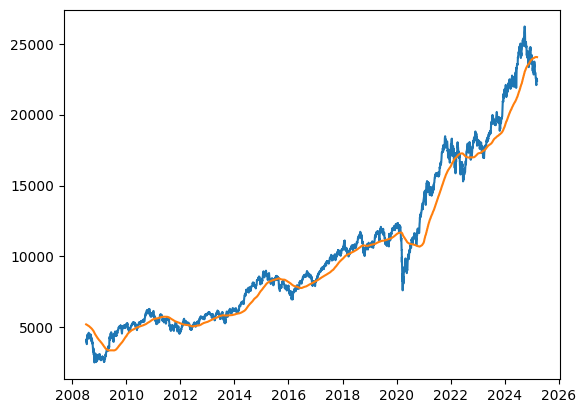

In [51]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.plot(df['MA200'])
plt.show()

In [52]:
import pandas as pd
pd.options.mode.chained_assignment=None

In [53]:
df['priceChange']=df['Close'].pct_change()
df

Price,Ticker,Close,High,Low,Open,Volume,MA200,priceChange
Date,,,,,,,,
2008-07-07,^NSEI,4030.000000,4114.500000,4002.000000,4002.000000,0,5210.716744,NaN
2008-07-08,^NSEI,3988.550049,4028.699951,3896.050049,4028.699951,0,5208.186245,-0.010285
2008-07-09,^NSEI,4157.100098,4169.399902,3990.899902,3990.899902,0,5206.240745,0.042258
2008-07-10,^NSEI,4162.200195,4187.950195,4110.399902,4155.649902,0,5203.389995,0.001227
2008-07-11,^NSEI,4049.000000,4215.500000,4014.449951,4166.000000,0,5199.897246,-0.027197
...,...,...,...,...,...,...,...,...
2025-03-07,^NSEI,22552.500000,22633.800781,22464.750000,22508.650391,289800,24064.496260,0.000346
2025-03-10,^NSEI,22460.300781,22676.750000,22429.050781,22521.849609,293900,24063.808760,-0.004088
2025-03-11,^NSEI,22497.900391,22522.099609,22314.699219,22345.949219,347900,24061.460010,0.001674


In [54]:
df=df.dropna()

In [55]:
df['Upmove']=df['priceChange'].apply(lambda x: x if x>0 else 0)
df['Downmove']=df['priceChange'].apply(lambda x: abs(x) if x<0 else 0)
df

Price,Ticker,Close,High,Low,Open,Volume,MA200,priceChange,Upmove,Downmove
Date,,,,,,,,,,
2008-07-08,^NSEI,3988.550049,4028.699951,3896.050049,4028.699951,0,5208.186245,-0.010285,0.000000,0.010285
2008-07-09,^NSEI,4157.100098,4169.399902,3990.899902,3990.899902,0,5206.240745,0.042258,0.042258,0.000000
2008-07-10,^NSEI,4162.200195,4187.950195,4110.399902,4155.649902,0,5203.389995,0.001227,0.001227,0.000000
2008-07-11,^NSEI,4049.000000,4215.500000,4014.449951,4166.000000,0,5199.897246,-0.027197,0.000000,0.027197
2008-07-14,^NSEI,4039.699951,4118.100098,4004.250000,4047.449951,0,5195.907997,-0.002297,0.000000,0.002297
...,...,...,...,...,...,...,...,...,...,...
2025-03-07,^NSEI,22552.500000,22633.800781,22464.750000,22508.650391,289800,24064.496260,0.000346,0.000346,0.000000
2025-03-10,^NSEI,22460.300781,22676.750000,22429.050781,22521.849609,293900,24063.808760,-0.004088,0.000000,0.004088
2025-03-11,^NSEI,22497.900391,22522.099609,22314.699219,22345.949219,347900,24061.460010,0.001674,0.001674,0.000000


Exponential Moving Average-
Here AvgU and AvgD are calculated from up moves and down moves using an exponential moving average in the same way as you would calculate an EMA of price. The EMA period is the RSI period. The formula is:

AvgUt = a * Ut + ( 1 – a ) * AvgUt-1

AvgDt = a * Dt + ( 1 – a ) * AvgDt-1

a = 2 / ( N + 1 )

N = RSI period

Wilder's Smoothing Method
J. Welles Wilder, the inventor of RSI, calculated the indicator using a smoothing method with the same logic as an exponential moving average, only the smoothing factor is different:

a = 1 / N

and therefore 1 – a = ( N – 1 ) / N

N = RSI period

For example, for RSI 14 the formula for average up move is:

AvgUt = 1/14 * Ut + 13/14 * AvgUt-1

SOURCE - https://www.macroption.com/rsi-calculation/

##### for RSI 10 period the calculation of N is important if we are using python exponential formula. The alpha for rsi period 10 based on Wilder is 1/10. So substituting the alpha=2/(N+1) the N will be 19.

In [56]:
df['avgUp']=df['Upmove'].ewm(span=19).mean()
df['avgDown']=df['Downmove'].ewm(span=19).mean()
df

Price,Ticker,Close,High,Low,Open,Volume,MA200,priceChange,Upmove,Downmove,avgUp,avgDown
Date,,,,,,,,,,,,
2008-07-08,^NSEI,3988.550049,4028.699951,3896.050049,4028.699951,0,5208.186245,-0.010285,0.000000,0.010285,0.000000,0.010285
2008-07-09,^NSEI,4157.100098,4169.399902,3990.899902,3990.899902,0,5206.240745,0.042258,0.042258,0.000000,0.022241,0.004872
2008-07-10,^NSEI,4162.200195,4187.950195,4110.399902,4155.649902,0,5203.389995,0.001227,0.001227,0.000000,0.014487,0.003074
2008-07-11,^NSEI,4049.000000,4215.500000,4014.449951,4166.000000,0,5199.897246,-0.027197,0.000000,0.027197,0.010274,0.010089
2008-07-14,^NSEI,4039.699951,4118.100098,4004.250000,4047.449951,0,5195.907997,-0.002297,0.000000,0.002297,0.007765,0.008186
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-07,^NSEI,22552.500000,22633.800781,22464.750000,22508.650391,289800,24064.496260,0.000346,0.000346,0.000000,0.002312,0.002831
2025-03-10,^NSEI,22460.300781,22676.750000,22429.050781,22521.849609,293900,24063.808760,-0.004088,0.000000,0.004088,0.002081,0.002957
2025-03-11,^NSEI,22497.900391,22522.099609,22314.699219,22345.949219,347900,24061.460010,0.001674,0.001674,0.000000,0.002040,0.002661


In [57]:
df['RS']= df['avgUp']/df['avgDown']
df['RSI']= df['RS'].apply(lambda x: 100-(100/(x+1)))
df


Price,Ticker,Close,High,Low,Open,Volume,MA200,priceChange,Upmove,Downmove,avgUp,avgDown,RS,RSI
Date,,,,,,,,,,,,,,
2008-07-08,^NSEI,3988.550049,4028.699951,3896.050049,4028.699951,0,5208.186245,-0.010285,0.000000,0.010285,0.000000,0.010285,0.000000,0.000000
2008-07-09,^NSEI,4157.100098,4169.399902,3990.899902,3990.899902,0,5206.240745,0.042258,0.042258,0.000000,0.022241,0.004872,4.565122,82.030941
2008-07-10,^NSEI,4162.200195,4187.950195,4110.399902,4155.649902,0,5203.389995,0.001227,0.001227,0.000000,0.014487,0.003074,4.712381,82.494166
2008-07-11,^NSEI,4049.000000,4215.500000,4014.449951,4166.000000,0,5199.897246,-0.027197,0.000000,0.027197,0.010274,0.010089,1.018397,50.455743
2008-07-14,^NSEI,4039.699951,4118.100098,4004.250000,4047.449951,0,5195.907997,-0.002297,0.000000,0.002297,0.007765,0.008186,0.948620,48.681621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-07,^NSEI,22552.500000,22633.800781,22464.750000,22508.650391,289800,24064.496260,0.000346,0.000346,0.000000,0.002312,0.002831,0.816729,44.956017
2025-03-10,^NSEI,22460.300781,22676.750000,22429.050781,22521.849609,293900,24063.808760,-0.004088,0.000000,0.004088,0.002081,0.002957,0.703814,41.308149
2025-03-11,^NSEI,22497.900391,22522.099609,22314.699219,22345.949219,347900,24061.460010,0.001674,0.001674,0.000000,0.002040,0.002661,0.766716,43.397817


### Define the location in our DF definined by the strategy buy and sell condition. RECAP:

Entry (buy on next day open):
1. Price above 200 SMA
2. 10 period RSI below 30

Exit(sell on next day open):
1. 10 period RSI above 40 or after 10 trading days

In [61]:
# signal for buy using iloc
df.loc[(df['Close']>df['MA200']) & (df['RSI']<30),'Buy']='Yes'
df.loc[(df['Close']<df['MA200']) | (df['RSI']>30), 'Buy']='No'
# signal for buy using np.where
import numpy as np
df['Signal']=np.where((df['Close']>df['MA200'])&(df['RSI']<30),1,0)
df[['Close','MA200','RSI','Buy','Signal']].tail(5)

Price,Close,MA200,RSI,Buy,Signal
Date,,,,,
2025-03-07,22552.500000,24064.496260,44.956017,No,0
2025-03-10,22460.300781,24063.808760,41.308149,No,0
2025-03-11,22497.900391,24061.460010,43.397817,No,0
2025-03-12,22470.500000,24059.027012,42.183732,No,0
2025-03-13,22397.199219,24056.350762,38.941582,No,0


In [63]:
# Check the buy trades
filterBuy=df['Buy']=="Yes"
df[filterBuy][['Close','MA200','RSI','Buy','Signal']].tail(20)

Price,Close,MA200,RSI,Buy,Signal
Date,,,,,
2019-07-26,11284.299805,11131.633018,29.478796,Yes,1
2019-07-29,11189.200195,11132.537520,25.028911,Yes,1
2020-02-03,11707.900391,11655.346758,25.806208,Yes,1
2020-09-24,10805.549805,10762.755010,23.307455,Yes,1
2021-01-29,13634.599609,11539.206753,29.781901,Yes,1
2021-11-22,17416.550781,16020.263730,29.802888,Yes,1
2021-11-26,17026.449219,16080.901230,26.629126,Yes,1
2021-11-29,17053.949219,16091.692725,28.025969,Yes,1
2021-11-30,16983.199219,16101.987471,26.581672,Yes,1


### Calculate the Dates for our buys and sells

In [64]:
Buy_dates=[]
Sell_dates=[]
# Looping over the entire rows of df
for i in range(len(df)):
    # if the signal=1
    if df.Signal.iloc[i]: 
        # buy on the next date of signal=1
        Buy_dates.append(df.iloc[i+1].name) 
        # Start looping in the subsequent 10 rows to check if the rsi is above 40, else we sell above 10 days
        for j in range(1,11):
            # if rsi is above 40 anytime in next 10 days
            if df['RSI'].iloc[i+j]>40:
                #sell on the very next date of the signal
                Sell_dates.append(df.iloc[i+j+1].name)
                #if the rsi is greater than 40 we break from this loop
                break
            # else if rsi was never above 40 then we sell above 10 days
            elif j == 10:
                Sell_dates.append(df.iloc[i+j+1].name)

frame = pd.DataFrame({'Buying_Dates':Buy_dates,'Selling_Dates':Sell_dates})
frame

,Buying_Dates,Selling_Dates
0,2009-10-30,2009-11-06
1,2009-11-03,2009-11-06
2,2009-11-04,2009-11-06
3,2010-01-25,2010-02-09
4,2010-01-27,2010-02-10
...,...,...
62,2024-10-24,2024-11-07
63,2024-10-25,2024-11-07
64,2024-10-28,2024-11-07
65,2024-11-05,2024-11-07


#### OVERLAPPING-Solving for the multiple trades for the same signal ---by shifting the sell dates to the next row we can fix it--1 flaw is that the very first trade will get removed due to nan sell date so we need to add it manually
https://www.youtube.com/watch?v=rYfe9Bg2GcY

In [65]:
actualTrades=frame[frame.Buying_Dates>frame.Selling_Dates.shift(1)]
earlier =actualTrades.shape
#Taking the first datapoint from the frame and appending to actual Trades
actualTrades = frame[:1].append(actualTrades)
after = actualTrades.shape
print(f"the shape before{earlier} and the shape now {after}")

the shape before(31, 2) and the shape now (32, 2)


C:\Users\arunj\AppData\Local\Temp\ipykernel_98336\1859641044.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actualTrades = frame[:1].append(actualTrades)


In [66]:
actualTrades

,Buying_Dates,Selling_Dates
0,2009-10-30,2009-11-06
3,2010-01-25,2010-02-09
11,2010-05-10,2010-05-11
12,2010-11-29,2010-12-01
13,2011-01-11,2011-01-13
15,2011-01-17,2011-01-25
17,2013-02-12,2013-02-14
18,2013-02-27,2013-03-06
22,2013-03-26,2013-04-02
23,2013-06-12,2013-06-18


### Calculate the PnL

In [67]:
# Using the actual trades dates loc values and screening it over our orginal df 
profits = df.loc[actualTrades.Selling_Dates].Open.values - df.loc[actualTrades.Buying_Dates].Open.values
profits

array([  16.39990234, -274.        ,  163.14990234,   81.04980469,
         82.79980469,  114.5       ,   38.85009766,   31.5       ,
         87.95019531,   70.14990234,  139.94970703,  213.79980469,
        131.59960938, -468.25      ,  189.79980469,  147.94921875,
        135.        ,  -11.        ,  173.25      , -638.10058594,
        393.20019531, -556.84960938,  219.59960938,  378.19921875,
        722.5       ,  143.15039062,  293.65039062,  254.34960938,
        297.09960938,  213.75      ,  -69.40039062,  711.40039062])

In [68]:
## winning rates
wins = len([i for i in profits if i>0])
trades=len(profits)
winRatio= wins/trades
winRatio

0.8125

In [69]:
## Relative profits
relProfits = (df.loc[actualTrades.Selling_Dates].Open.values - df.loc[actualTrades.Buying_Dates].Open.values)/df.loc[actualTrades.Buying_Dates].Open.values
relProfits

array([ 0.00345181, -0.05442393,  0.03245731,  0.01399836,  0.01435515,
        0.02026979,  0.00659107,  0.00544521,  0.01566692,  0.01215401,
        0.02353045,  0.02658805,  0.01567408, -0.05485751,  0.01945517,
        0.01519547,  0.01341488, -0.00103703,  0.01695828, -0.05816805,
        0.03492412, -0.04896565,  0.01863185,  0.0346641 ,  0.05251261,
        0.00828333,  0.01750717,  0.01426494,  0.01709114,  0.01123389,
       -0.00284683,  0.03021816])

In [50]:
relProfits.mean()

0.008228900154934006

In [70]:
## Cummulative Returns
(relProfits+1).cumprod()

array([1.00345181, 0.94884002, 0.97963681, 0.99335012, 1.00760981,
       1.02803385, 1.0348097 , 1.04044446, 1.05674502, 1.06958871,
       1.09475661, 1.12386405, 1.14147959, 1.07886086, 1.09985029,
       1.11656303, 1.1315416 , 1.13036815, 1.14953725, 1.08267091,
       1.12048224, 1.0656171 , 1.08547151, 1.12309841, 1.18207524,
       1.19186675, 1.21273297, 1.23003253, 1.25105519, 1.26510941,
       1.26150786, 1.2996283 ])

In [71]:
## Cummulative Returns in absolute term
cash = 100000
cash*(relProfits+1).cumprod()

array([100345.18115819,  94884.00176698,  97963.6809381 ,  99335.01176801,
       100760.9810109 , 102803.3851896 , 103480.9699085 , 104044.44561372,
       105674.50204889, 106958.8709143 , 109475.66128404, 112386.40525659,
       114147.95921453, 107886.08627985, 109985.02876038, 111656.30340259,
       113154.15957188, 113036.81515182, 114953.72480312, 108267.09105852,
       112048.22392569, 106561.70984763, 108547.15134572, 112309.84073994,
       118207.52380642, 119186.67540899, 121273.29676372, 123003.25318554,
       125105.51935978, 126510.94078237, 126150.78594831, 129962.83017164])

### FINAL ALGO TO FIND THE STOCKS GIVING MAX RETURN FROM THIS STRATEGY

In [52]:
import pandas_ta as ta
def getactualTrades(df):
    Buy_dates=[]
    Sell_dates=[]
    for i in range(len(df) - 11):
        # if the signal=1
        if df.Signal.iloc[i]: 
            # buy on the next date of signal=1
            Buy_dates.append(df.iloc[i+1].name) 
            # Start looping in the subsequent 10 rows to check if the rsi is above 40, else we sell above 10 days
            for j in range(1,11):
                # if rsi is above 40 anytime in next 10 days
                if df['RSI'].iloc[i+j]>40:
                    #sell on the very next date of the signal
                    Sell_dates.append(df.iloc[i+j+1].name)
                    #if the rsi is greater than 40 we break from this loop
                    break
                # else if rsi was never above 40 then we sell above 10 days
                elif j == 10:
                    Sell_dates.append(df.iloc[i+j+1].name)
    frame = pd.DataFrame({'Buying_Dates':Buy_dates,'Selling_Dates':Sell_dates})
    actualTrades=frame[frame.Buying_Dates>frame.Selling_Dates.shift(1)]
    #Taking the first datapoint from the frame and appending to actual Trades
    actualTrades = frame[:1].append(actualTrades)
    return actualTrades
def taCalc(df):
    df['RSI'] = ta.rsi(df['Close'],length=14)
    df['SMA200'] = ta.sma(df['Close'], length=200)
    df['Signal'] = np.where((df['Close']>df.SMA200) & (df['RSI']<30),1,0)

In [ ]:
import pickle
import yfinance
with open("nifty50tickers.pickle",'rb') as f:
    tickers=pickle.load(f)
tickers_yahoo = [i +'.NS' for i in tickers]
print(tickers_yahoo)
matrixProfits=[]
for ticker in tickers_yahoo:
    print(ticker)
    df = yfinance.download(ticker,group_by ='Ticker', start="2020-01-01", end=None)  
    print(data)
    # df = taCalc(df)
    # actualTrades = getactualTrades(df)
    # relProfits = (df.loc[actualTrades.Selling_Dates].Open.values - df.loc[actualTrades.Buying_Dates].Open.values)/df.loc[actualTrades.Buying_Dates].Open.values
    # matrixProfits.append(relProfits)

['ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'LTIM.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SHRIRAMFIN.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TATACONSUM.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'WIPRO.NS']
ADANIENT.NS


[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-11-27   154.000000   207.000000   154.000000   191.800003   175.274445   
2007-11-28   194.000000   197.800003   174.929993   177.000000   161.749634   
2007-11-29   181.000000   182.800003   168.460007   177.399994   162.115128   
2007-11-30   178.000000   191.399994   178.000000   185.800003   169.791397   
2007-12-03   187.949997   198.860001   184.399994   196.000000   179.112579   
...                 ...          ...          ...          ...          ...   
2024-04-05  1367.000000  1381.900024  1357.349976  1375.550049  1375.550049   
2024-04-08  1381.949951  1381.949951  1337.000000  1348.650024  1348.650024   
2024-04-09  1356.150024  1364.900024  1346.099976  1356.500000  1356.500000   
2024-04-10  1359.000000  1359.900024  1348.199951  1352.300049  1352.300049   
2024-04-12  1350.000000  1358.400024  1341.000000  1